In [322]:
# import libraries

from numpy import *
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

### Generation of Dataset #1

In [394]:
# Generate A

muA=0
sigmaA=1
np.random.seed(0)
A=mat(np.random.normal(muA,sigmaA,(3,2)))
print("A=\n",A,"\n","Rank(A)=",la.matrix_rank(A))

A=
 [[ 1.76405235  0.40015721]
 [ 0.97873798  2.2408932 ]
 [ 1.86755799 -0.97727788]] 
 Rank(A)= 2


In [229]:
# Generate X

muv=0
sigmav=1
np.random.seed(0)
v=mat(np.random.normal(muv,sigmav,(2,500)))
X=A*v
print("Rank(X)=",la.matrix_rank(X))

Rank(X)= 2


### Singular Value and Eigenvalue Decomposition of Dataset #1

In [212]:
# SVD

Us,Sigma,VTs=la.svd(X)
print(Us)
print(Sigma**2)

[[-0.63040333  0.13446524 -0.76453302]
 [-0.59765696 -0.71257779  0.3674766 ]
 [-0.49537642  0.68858696  0.5295755 ]]
[3.90283890e+03 2.75575917e+03 1.27672547e-28]


In [213]:
# Eigenvalue decomposition

XXT=X*X.T
Lambda,Ue=la.eig(XXT)
print(Ue)
print(Lambda)

[[-0.76453302  0.63040333  0.13446524]
 [ 0.3674766   0.59765696 -0.71257779]
 [ 0.5295755   0.49537642  0.68858696]]
[   0.         3902.83889757 2755.75916839]


In [147]:
# Values comparison

dist=np.sqrt(np.sum(np.square(X)))
dist1=np.sqrt(np.sum(np.square(Sigma)))
print("energy(X)=",dist)
print("energy(Sigma)=",dist1)

energy(X)= 81.60023324697558
energy(Sigma)= 81.60023324697558


1.Ue seems different with Us but if look carefully the entries are actually same but displaced.

Unexpected situation happens if we look at the eigenvalues and singular values but they are mostly same.In singular values,a very little value appears instead of a expected ZERO.But it's indeed zero in the eigenvalues.

But for the energies we don't need to worry about that because their values are perfectly same.

2.We are not using infinite data samples,so the mean of the only 500 data samples can't exactly be 0 but a very small value which is very close to 0,so the non-zero third singular value which is expected to be zero is exactly the small non-zero mean.

### PCA of Dataset #1

1.Two principal components should be enough.  
X is generated by X=Av.
Compute the vector in X using linear algebra:
$$x_i=(X_{1i},X_{2i},X_{3i})^T$$
$$X_{1i}=A_{11}v_{1i}+A_{21}v_{2i}$$
$$X_{2i}=A_{12}v_{1i}+A_{22}v_{2i}$$
$$X_{3i}=A_{13}v_{1i}+A_{23}v_{2i}$$ 
The 3 dimensionalities of each vector in X is a linear combination of the 2 dimensionalities of the corresponding vector in v.As a result,the number of linearly independant dimensionalities is only 2.the maximum of the number of principal components can't be larger than the number of linearly independant dimensionalities,so 2 principal components are enough to capture all the variation in the data.

2.Compute the mean vector m.

In [399]:
m=np.mean(X,axis=1)
print("mean vector m=\n",m,"\nE(x_1)=",m[0],"\nE(x_2)=",m[1],"\nE(x_3)=",m[2])

mean vector m=
 [[1.86799685]
 [0.50666078]
 [1.05489603]] 
E(x_1)= [[1.86799685]] 
E(x_2)= [[0.50666078]] 
E(x_3)= [[1.05489603]]


The entries in mean vector are very close to zero.

3.Compute the top two principan components $U=\left[\begin{matrix}u_1 & u_2\end{matrix}\right]$

In [238]:
print("1st principal component U1=\n",Us[:,0])
print("2nd principal component U2=\n",Us[:,1])
k=2
U=Us[:,0:2]
UT=U.T

1st principal component U1=
 [[-0.63040333]
 [-0.59765696]
 [-0.49537642]]
2nd principal component U2=
 [[ 0.13446524]
 [-0.71257779]
 [ 0.68858696]]


4.Compute feature vectors $\tilde X$ and reconstruct the estimated original data $\hat X$ with the top two principal components

In [242]:
Xtilde=UT*X
Xhat=U*Xtilde
error=np.sqrt(sum(np.square(Xhat-X)))
print("The error is:",error)

The error is: 3.3792812972855794e-14


The error between estimated data from two top principal component is very small.

5.Do the same thing with only the top principal component.

In [245]:
Xtilde1=UT[0,:]*X
Xhat1=U[:,0]*Xtilde1
error1=np.sqrt(sum(np.square(Xhat1-X)))
print("The error is:",error1,"\nThe second-largest singular value is:",Sigma[1])

The error is: 52.4953252051138 
The second-largest singular value is: 52.4953252051138


The error is exactly equal to the second-largest singular value.

Text(0.5,0.92,'3D scatterplot of the original data samples')

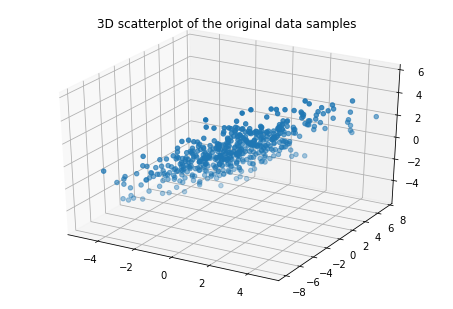

In [252]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[0], X[1], X[2])
ax.set_title("3D scatterplot of the original data samples")

Text(0.5,0.92,'3D scatterplot of the reconstructed data samples (the top principal component)')

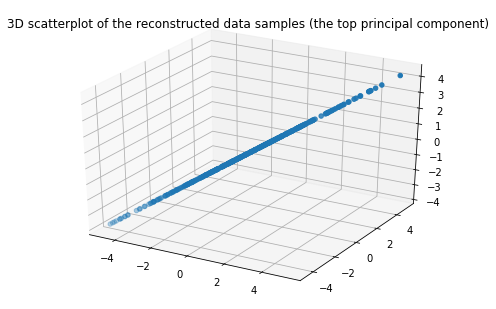

In [253]:
fig1 = plt.figure()
ax1 = Axes3D(fig1)
ax1.scatter(Xhat1[0], Xhat1[1], Xhat1[2])
ax1.set_title("3D scatterplot of the reconstructed data samples (the top principal component)")

### Generation of Dataset #2

In [254]:
muc=0
sigmac=3
np.random.seed(0)
c=mat(np.random.normal(muv,sigmav,(3,1)))

In [256]:
muv1=0
sigmav1=1
np.random.seed(1)
v1=mat(np.random.normal(muv1,sigmav1,(2,500)))

In [259]:
X1=A*v1+c
print("Rank(X)=",la.matrix_rank(X1))

Rank(X)= 3


### PCA,Centering,and Dataset #2

In [278]:
Us1,Sigma1,VTs1=la.svd(X1)
Us1T=Us1.T
error2=np.sqrt(sum(np.square(Us1[:,0:2]*Us1T[0:2,:]*X1-X1)))
print("After PCA without centering,the error is:",error2)

After PCA without centering,the error is: 12.009371532993406


Obvious error appeared without centering.

In [395]:
m1=np.mean(X1,axis=1)
print("mean vector m=\n",m1)
X1bar=X1-m1
Us1bar,Sigma1bar,VTs1bar=la.svd(X1bar)
Us1barT=Us1bar.T
error2bar=np.sqrt(sum(np.square(Us1bar[:,0:2]*Us1barT[0:2,:]*X1bar-X1+m1)))
print("After PCA with centering,the error is:",error2bar)

mean vector m=
 [[1.86799685]
 [0.50666078]
 [1.05489603]]
After PCA with centering,the error is: 1.497608146731477e-14


After centering,the error is close to 0.

### Generation of Dataset #3

In [284]:
mun=0
sigman=0.01
np.random.seed(0)
n=mat(np.random.normal(mun,sigman,(3,500)))

muv2=0
sigmav2=1
np.random.seed(2)
v2=mat(np.random.normal(muv2,sigmav2,(2,500)))

X2=A*v2+n

In [287]:
X2=X2/(np.sqrt(sum(np.square(X2))))
print("Rank(X)=",la.matrix_rank(X2))

Rank(X)= 3


In [291]:
Us2,Sigma2,VTs2=la.svd(X2)
print("Singular values of X is:",Sigma2)

Singular values of X is: [0.79263876 0.60968555 0.00270492]


### PCA Denoising of Dataset #3

Text(0.5,0.92,'3D scatterplot of the normalized data samples')

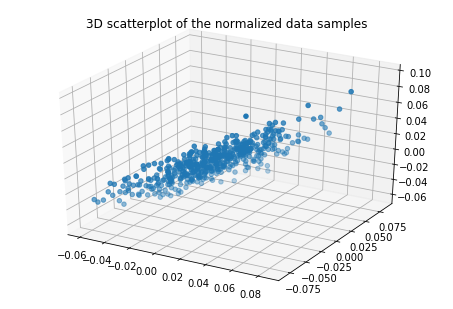

In [296]:
fig2 = plt.figure()
ax2 = Axes3D(fig2)
ax2.scatter(X2[0], X2[1], X2[2])
ax2.set_title("3D scatterplot of the normalized data samples")

In [297]:
m2=np.mean(X2,axis=1)
Us2T=Us2.T
error3=np.sqrt(sum(np.square(Us2[:,0:2]*Us2T[0:2,:]*X2-X2)))
print("The error is:",error3,"\nThe third singular value of X is:",Sigma2[2])

The error is: 0.0027049247414968063 
The third singular value of X is: 0.002704924741496813


The error is very close to the third singular value of X.

### Real Data

In [312]:
from sklearn.datasets import load_digits
images,labels=load_digits(1,return_X_y=True)
images=mat(images)
imagesT=images.T

In [313]:
image1=images[0]
image1=image1.reshape([8,8])

Text(0.5,1,'The 1st image')

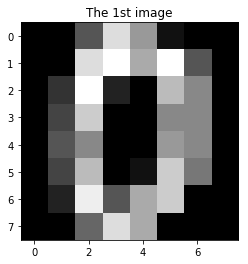

In [362]:
figR=plt.figure()
plt.imshow(image1,cmap=plt.cm.gray)
plt.title("The 1st image")

Text(0.5,1,'Mean')

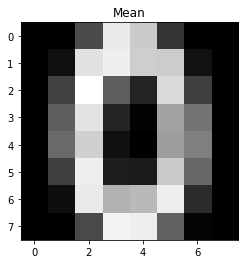

In [363]:
mR=np.mean(imagesT,axis=1)
mR88=mR.reshape([8,8])
plt.imshow(mR88,cmap=plt.cm.gray)
plt.title("Mean")

Text(0.5,1,'Singular values on a log scale')

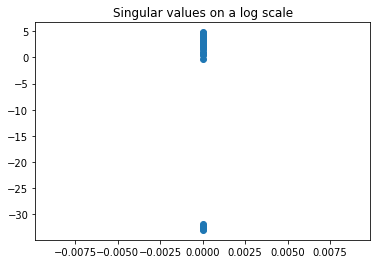

In [364]:
imbar=imagesT-mR
Ur,Sigmar,VTr=la.svd(imbar)
lgsv=[math.log(Sigmar[i]) for i in range(len(Sigmar))]
x=[0 for i in range(len(Sigmar))]
plt.scatter(x,lgsv)
plt.title("Singular values on a log scale")

In [370]:
k=0
for i in range(len(Sigmar)):
    sumr=0
    for j in range(i+1):
        sumr=sumr+Sigmar[j]**2
    k=k+1
    if sumr/(sum(np.square(imbar)))>=0.9:
        break;
print("k=",k)
pc=Ur[:,0:k]

k= 18


Text(0.5,1,'The first principal component')

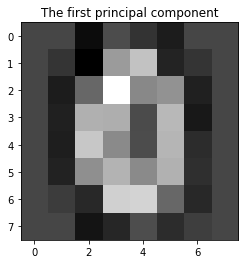

In [371]:
pc1=Ur[:,0]
pc188=pc1.reshape([8,8])
plt.imshow(pc188,cmap=plt.cm.gray)
plt.title("The first principal component")

Text(0.5,0.92,'3D scatterplot of the feature vectors')

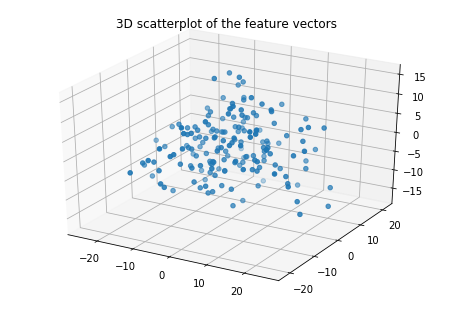

In [373]:
UrT=Ur.T
im3=UrT[0:3]*imbar
figt3 = plt.figure()
axt3 = Axes3D(figt3)
axt3.scatter(im3[0], im3[1], im3[2])
axt3.set_title("3D scatterplot of the feature vectors")

In [389]:
im3hat=Ur[:,0:3]*im3+mR
errort3=np.sqrt(sum(np.square(im3hat-imagesT)))
print("The representation error is ",errort3)
svsum=0
for i in range(3,63):
    svsum=svsum+Sigmar[i]**2
print("The square root of the sum of the 4~64 singular values is ",np.sqrt(svsum))

The representation error is  189.86840338965595
The square root of the sum of the 4~64 singular values is  189.86840338965604


The representation error is equal to the square root of the sum of the 4~64 singular values.

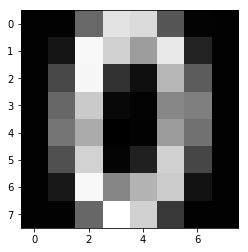

In [388]:
im3hatT=im3hat.T
im3hatT01=im3hatT[0].reshape(8,8)
plt.imshow(im3hatT01,cmap=plt.cm.gray)